In [13]:
# Dependencies
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
# Load in File from resources
# 'movie_scores.csv'
data_file=("csv1.csv")
data_file_pd=pd.read_csv(data_file, encoding="latin-1")


In [15]:
# Read and display with pandas
data_file_pd.head()

,Modelo,Versión,Trans.,Suma de R. Ajust. (km/l)
0,2011,110 DIESEL 5PTS 2.5L 4CIL 120HP MAN,M6,7.50
1,2011,2PTS 1.0L 3CIL 70HP AUT,AUT,15.54
2,2011,2PTS 1.0L 3CIL 83HP AUT,AUT,14.98
3,2011,2PTS 1.8L 4CIL 161HP AUT,AUT,8.59
4,2011,2PTS 1.8L 4CIL 161HP MAN,M6,8.61


In [16]:
data_file_two=("csv2.csv")
data_file_pd_two=pd.read_csv(data_file_two, encoding="latin-1")

In [17]:
data_file_pd_two.head()

,Marca,Modelo,Versión
0,ACURA,ILX,20 TECH 4PTS 2.0L 4CIL 150HP AUT
1,ACURA,ILX,ADVANCE 4PTS 2.4L 4CIL 201HP AUT
2,ACURA,ILX,ADVANCE SEDAN 4PTAS 2.4L 4CIL 201HP AUT
3,ACURA,ILX,BASE 4PTS 2.0L 4CIL 150HP AUT
4,ACURA,ILX,PREMIUM 4PTS 2.0L 4CIL 150HP AUT


In [18]:
Merge_table= pd.merge(data_file_pd, data_file_pd_two, on="Versión", how="left")
Merge_table.head(10)

,Modelo_x,Versión,Trans.,Suma de R. Ajust. (km/l),Marca,Modelo_y
0,2011,110 DIESEL 5PTS 2.5L 4CIL 120HP MAN,M6,7.50,LAND ROVER,DEFENDER
1,2011,2PTS 1.0L 3CIL 70HP AUT,AUT,15.54,SMART,FORTWO
2,2011,2PTS 1.0L 3CIL 83HP AUT,AUT,14.98,SMART,FORTWO
3,2011,2PTS 1.8L 4CIL 161HP AUT,AUT,8.59,MERCEDES,SLK200 K
4,2011,2PTS 1.8L 4CIL 161HP MAN,M6,8.61,MERCEDES,SLK200 K
5,2011,2PTS 2.0L 4CIL 158HP AUT,AUT,9.49,MAZDA,MX-5
6,2011,2PTS 2.0L 4CIL 167HP MAN,M6,9.95,MAZDA,MX-5
7,2011,2PTS 2.5L 5CIL 150HP MAN,M5,10.59,VW,BEETLE
8,2011,2PTS 2.5L 5CIL 150HP TIP,TIPTRONIC,10.20,VW,BEETLE
9,2011,2PTS 2.5L 5CIL 230HP AUT,AUT,7.64,VOLVO,C70


In [31]:
Brandsperf=Merge_table.groupby("Marca")["Suma de R. Ajust. (km/l)"].mean()
brandsperf=pd.DataFrame(Brandsperf)
brandsperf_clean = brandsperf.rename(columns={'Suma de R. Ajust. (km/l)': 'Rendimiento'})
brandsperf_clean

,Rendimiento
Marca,
ACURA,10.252895
ALFA ROMEO,10.883529
AUDI,10.264076
BENTLEY,5.142041
BMW,11.715987
BUICK,10.926250
CADILLAC,8.541282
CHEVROLET,11.499203
CHRYSLER,9.339394


In [32]:
transperf=Merge_table.groupby("Trans.")["Suma de R. Ajust. (km/l)"].mean()
transperf=pd.DataFrame(transperf)
transperf_two=transperf.drop(["(en blanco)"])
transperf_clean = transperf_two.rename(columns={'Suma de R. Ajust. (km/l)': 'Rendimiento'})
transperf_clean

,Rendimiento
Trans.,
ASG,13.732500
AUT,10.304634
CVT,11.785945
DCT,9.580000
DKG,6.873333
DSG,12.156641
DUALOGIC,11.423333
G TRONIC,13.021471
M5,10.998400


Text(0.5, 1.0, 'Rendimiento por marca')

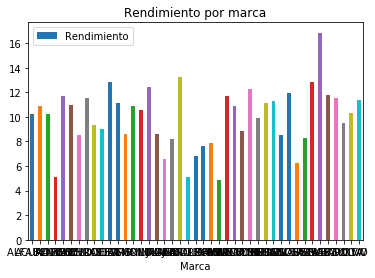

In [45]:
#Gráfica de performance de marca 
brandsperf_clean['Marca'] = brandsperf_clean.index
brandsperf_clean.plot.bar(x='Marca', y='Rendimiento', rot=0)
plt.title('Rendimiento por marca')

Text(0.5, 1.0, 'Rendimiento por tipo de transmisión')

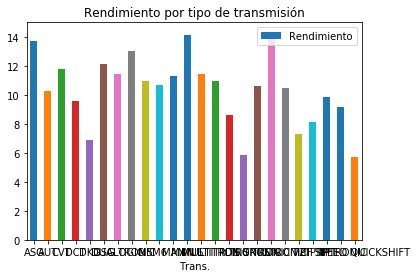

In [46]:
#Gráfica de performance por transmisión 

transperf_clean['Trans.'] = transperf_clean.index
transperf_clean.plot.bar(x='Trans.', y='Rendimiento', rot=0)
plt.title('Rendimiento por tipo de transmisión')